# Supermarket Sales Prediction


![](https://www.growthmanifesto.com/wp-content/uploads/2018/08/supermarket-sales.jpg)

**The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company.**

# IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

# LOADING THE DATASET

Data collection: The dataset is from Kaggle

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/gngnggnn1/mengxin2017/refs/heads/master/supermarket_sales%20-%20Sheet1.csv")

# Dataset forecasting

When we input data, it displays the contents of the data DataFrame, which was created by reading the CSV file from the specified URL. Since it contains supermarket sales data, it likely includes columns such as:

    Invoice ID: Unique identifier for each transaction.
    Branch: Branch location of the supermarket.
    City: City where the branch is located.
    Customer Type: Type of customer (e.g., member, non-member).
    Gender: Gender of the customer.
    Product Line: Category of the purchased products.
    Unit Price: Price per unit of product.
    Quantity: Number of units purchased.
    Tax 5%: Calculated 5% tax on the total amount.
    Total: Total amount including tax.
    Date: Date of the transaction.
    Time: Time of the transaction.
    Payment: Payment method (e.g., cash, credit card).
    COGS: Cost of goods sold.
    Gross Margin Percentage: Margin percentage.
    Gross Income: Profit made from the transaction.
    Rating: Customer rating of the transaction.

In [3]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


See the first 5 rows of data.

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


The data.describe() command provides a summary of statistics for the numerical columns in the data DataFrame.

In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


The data.info() command provides a concise summary of the DataFrame, including information about each column’s data type, number of non-null entries, and memory usage.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The data.value_counts() command returns the count of unique values in a DataFrame or Series. When used on a DataFrame like data, it shows the unique combinations of values across all columns, with the number of occurrences for each combination. This is useful for identifying how frequently each exact row appears, but it’s rarely used with an entire DataFrame because datasets often have unique rows.

Instead, data.value_counts() is typically applied to a specific column (e.g., data["City"].value_counts()) to show the frequency of each unique value in that column.

In [7]:
data.value_counts()

Invoice ID   Branch  City       Customer type  Gender  Product line         Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
101-17-6199  A       Yangon     Normal         Male    Food and beverages   45.79       7         16.0265  336.5565  3/13/2019  19:44  Credit card  320.53  4.761905                 16.0265       7.0       1
641-62-7288  B       Mandalay   Normal         Male    Home and lifestyle   99.92       6         29.9760  629.4960  3/24/2019  13:33  Ewallet      599.52  4.761905                 29.9760       7.1       1
633-91-1052  A       Yangon     Normal         Female  Home and lifestyle   12.03       2         1.2030   25.2630   1/27/2019  15:51  Cash         24.06   4.761905                 1.2030        5.1       1
634-97-8956  A       Yangon     Normal         Male    Food and beverages   32.90       3         4.9350   103.6350  2/17/2019  17:27  Credit card  98.70   4.761905             

The data.shape command returns the dimensions of the DataFrame as a tuple: (number of rows, number of columns).

The data.shape returns (1000, 17), it means that the DataFrame has:

    1000 rows (individual records in the dataset)
    17 columns (variables or features associated with each record)

In [8]:
data.shape

(1000, 17)

The data.dtypes command displays the data type of each column in the DataFrame. Each column can have a data type such as:

    int64: Integer values.
    float64: Floating-point (decimal) values.
    object: Typically used for text or categorical data.
    datetime64: Dates and times, if converted to this type.

In [9]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

The data.columns command lists all the column names in the DataFrame. This provides an overview of the variables or features in the dataset, helping you quickly see what kind of data is available.

In [10]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Data Visualization & Data Preprocessing

**Checking Null Value**

The data.isnull().sum() command checks for missing values in each column of the DataFrame and returns the total count of NaN (null) values per column.

In [11]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

The data.isnull().any() command checks whether there are any missing values (NaN) in each column of the DataFrame. It returns a boolean Series where each column is marked as True if it contains at least one NaN value, and False if the column has no missing values.

In [12]:
data.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

**Select the numerical data - Data Preprocessing**

data.select_dtypes(include='number'): This selects all columns in the DataFrame data that have numerical data types (like int64 or float64). It excludes non-numeric columns (e.g., strings or dates).

In [13]:
numeric_data = data.select_dtypes(include='number')

**Data Visualization**

Check the gender of customers
This code creates a count plot of the Gender column from the data DataFrame and styles the plot.

The code will generate a bar chart that shows how many males and females are represented in the Gender column of the dataset, with a dark grid background for improved readability.

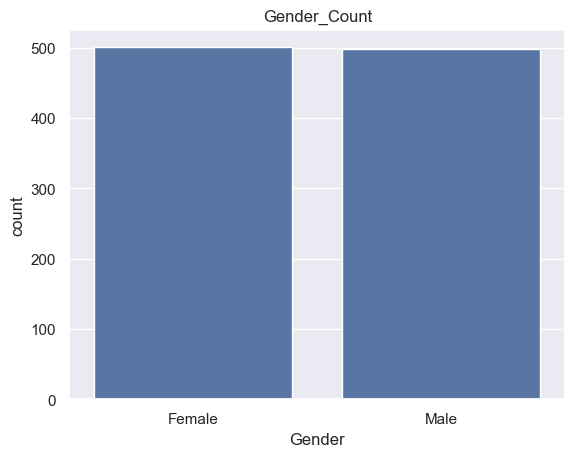

In [14]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =data).set_title("Gender_Count")

It seems that half of the customers are male and the other half is female.

**HISTOGRAM**

**A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**

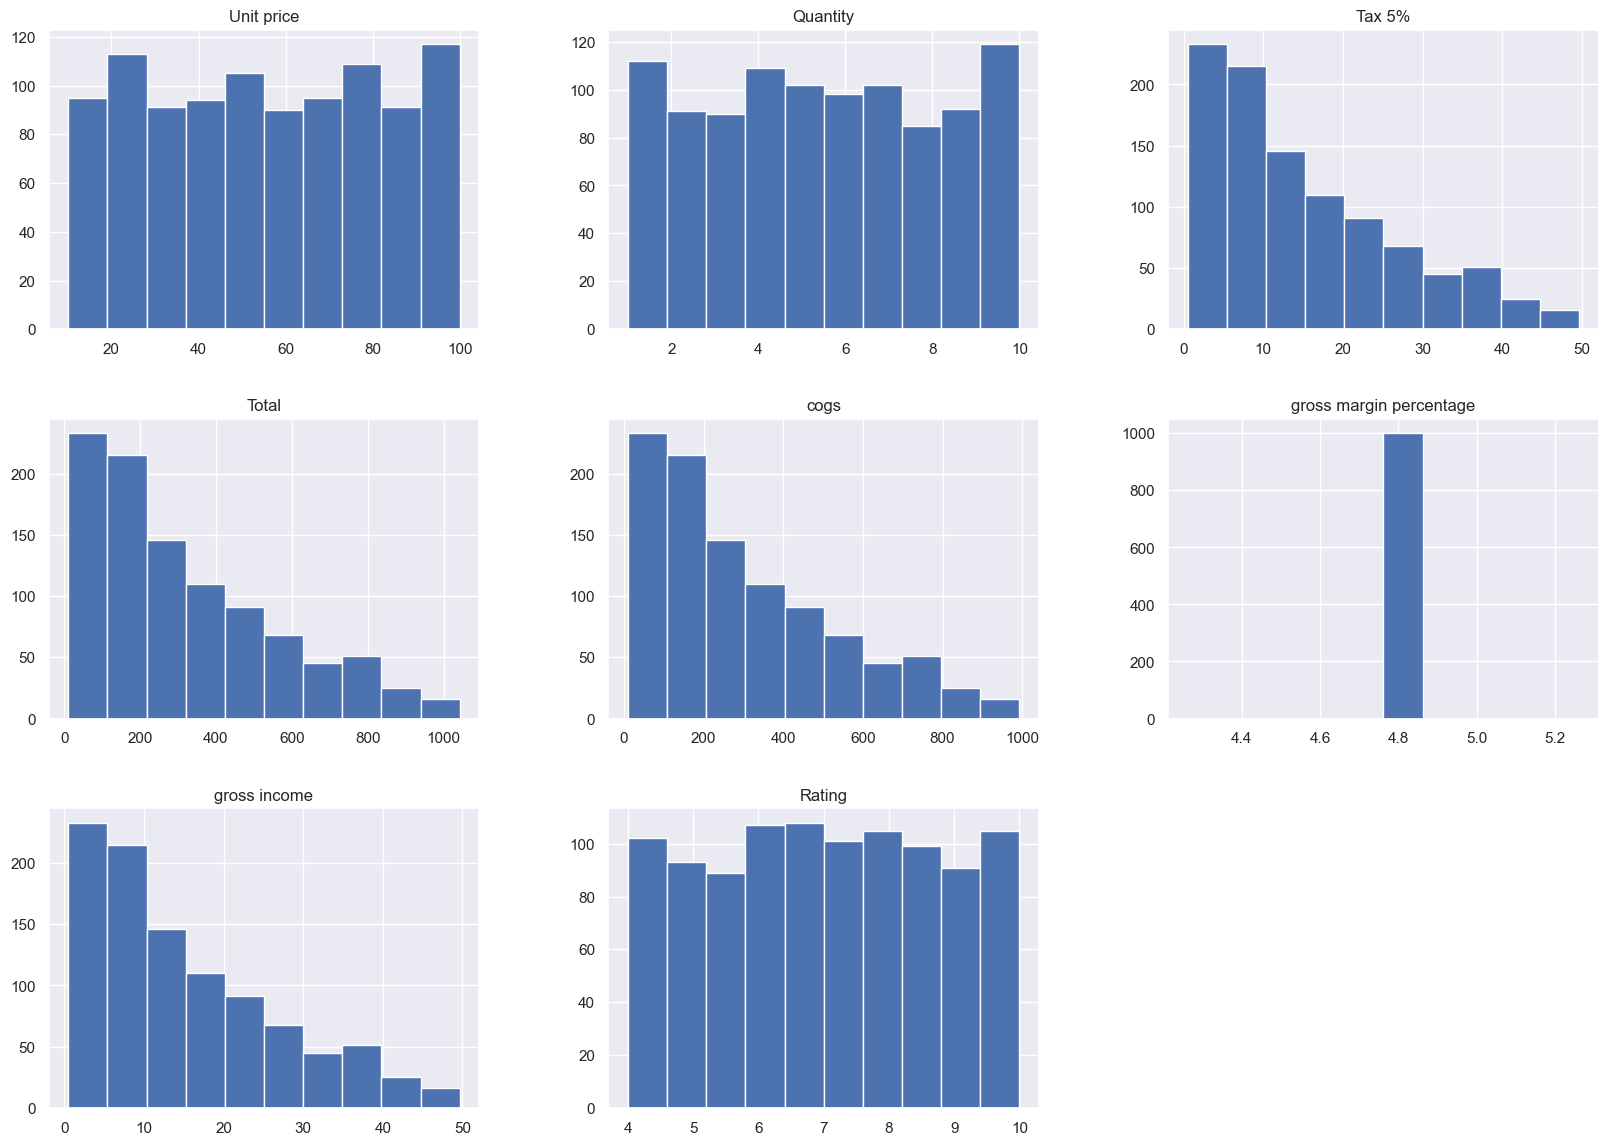

In [15]:
data.hist(figsize=(20,14))
plt.show()


The numeric_data.corr() method computes the correlation matrix for the numerical columns in the numeric_data DataFrame. This matrix shows the pairwise correlation coefficients between each numerical column.

In [16]:
numeric_data.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


**HEATMAP**

**A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.**

The code creates a heatmap to visually represent the correlation matrix of the numerical columns in the numeric_data DataFrame.
The heatmap will visualize these relationships.

<Axes: >

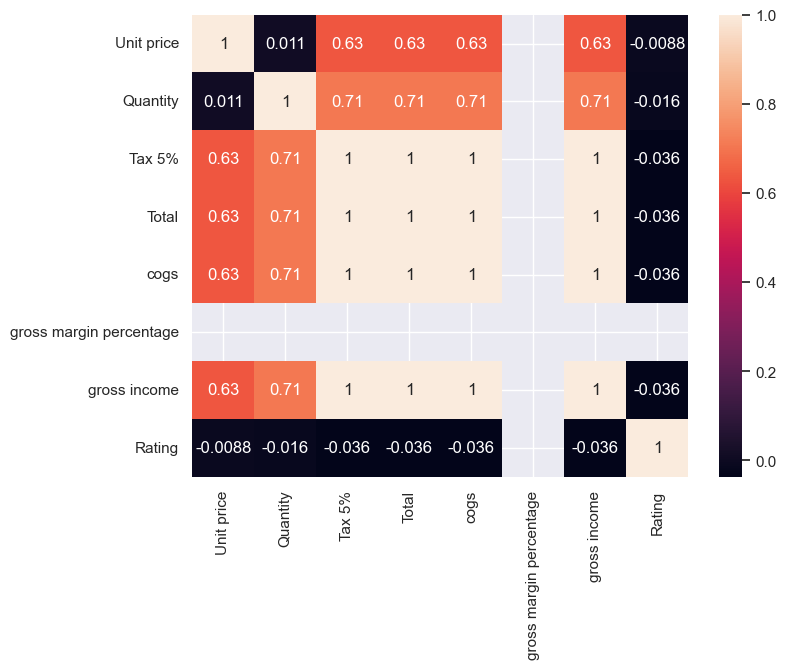

In [17]:
plt.figure(figsize = (8,6))

sns.heatmap(numeric_data.corr(), annot =True)

By analyzing the heatmap, we can gain several insights:
1. Identify Strong Correlations

    Positive correlations (close to 1): Features with high positive correlations are related, meaning when one increases, the other tends to increase as well. These are usually marked with dark red or warm colors (depending on the color scheme).
        For example, if the Total and Unit Price have a strong positive correlation (e.g., 0.95), it indicates that when the price of an item increases, the total sales tend to increase as well.
    Negative correlations (close to -1): Features with strong negative correlations move in opposite directions. When one increases, the other decreases. These are usually marked with dark blue or cool colors.
        For example, if there were a negative correlation between Discount and Price, it would suggest that as the discount increases, the price decreases.

2. Identify Weak or No Correlations (Near 0)

    Zero or near-zero correlations: Features with low or no correlation are unrelated to each other. These will have light colors (near white or pale).
        For example, if the Quantity and Payment Type have a correlation near 0, it suggests that these two features do not have a meaningful linear relationship.

Check the data columns

In [18]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**BOXPLOT**

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**



The code generates the following plots:

    1st plot (Unit price): Displays the distribution of unit prices.
    2nd plot (Quantity): Displays the distribution of the quantity of items sold.
    3rd plot (Total): Displays the distribution of the total amount spent in the transaction.
    4th plot (cogs): Displays the distribution of the cost of goods sold.
    5th plot (Rating): Displays the distribution of ratings (if present in the dataset).
    6th plot (gross income): Displays the distribution of gross income, which is likely the profit made on each sale.

<Axes: xlabel='gross income'>

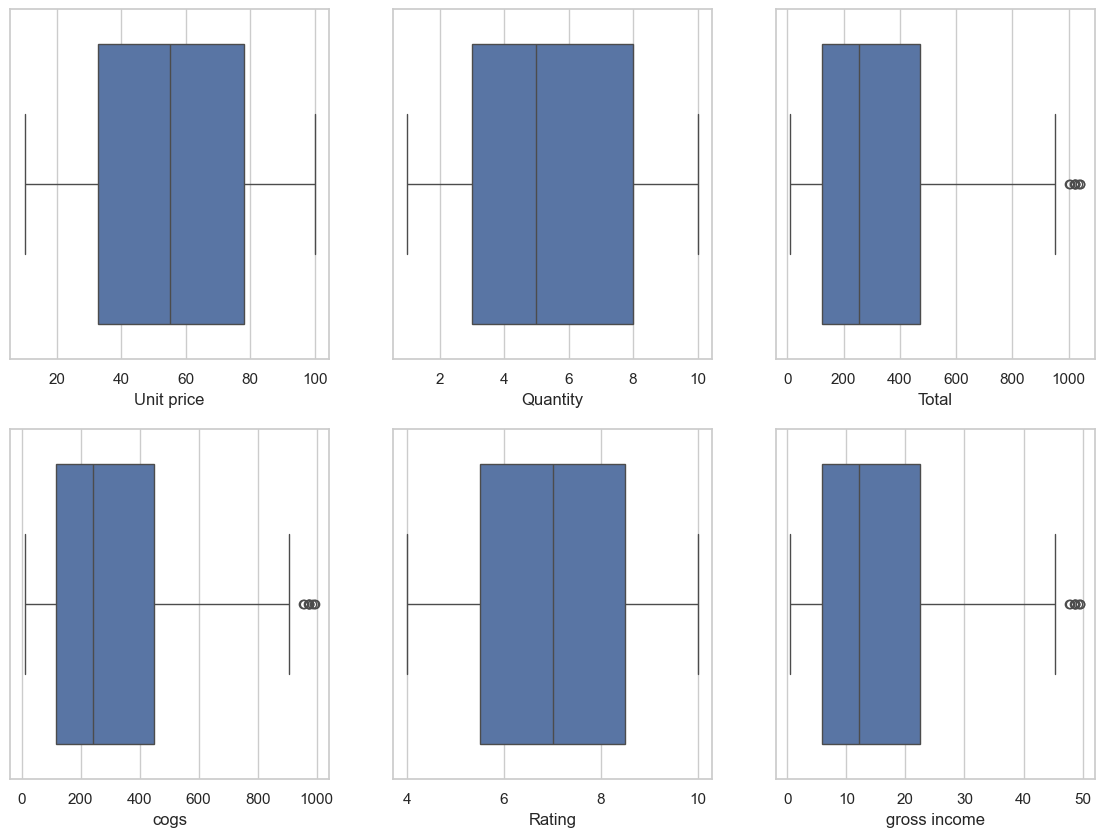

In [19]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=data)

Summary of Insights We Can Get from Box Plots:

    Outliers: Box plots highlight outliers—values that fall outside the whiskers (typically 1.5 times the interquartile range). We can quickly spot extreme values.
    Distribution: The size of the box and the whiskers will give us a sense of how spread out the data is.
        If the box is wide, it indicates a large variability.
        If the box is narrow, it shows that most values are clustered close to the median.
    Skewness: If the median line inside the box is not centered, the data might be skewed to the right (positive skew) or left (negative skew).
    Comparisons: We can compare the distribution of different features side by side in the same grid.

This set of box plots gives a detailed view of the data distribution across multiple features and will help identify any potential issues with the data (e.g., extreme outliers or skewness).

**PAIRPLOT**

**A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.**


If we run sns.pairplot(data=data), the resulting plot will show:

    Histograms on the diagonal for Unit Price, Quantity, Total, and Gross Income.
    Scatter plots on the off-diagonal showing pairwise comparisons, such as:
        Unit Price vs Quantity
        Unit Price vs Total
        Quantity vs Gross Income

Insights We Can Gain from a Pairplot:

    Correlations: Pairplots visually highlight relationships between numerical features, such as if two features increase or decrease together (positive or negative correlation).
    Clusters: The scatter plots can reveal clusters of data points, indicating groups with similar values or patterns in specific features.
    Outliers: Scatter plots can help identify outliers that deviate significantly from the general pattern.
    Distribution patterns: The diagonal distributions allow you to quickly assess the spread and shape of individual variables.

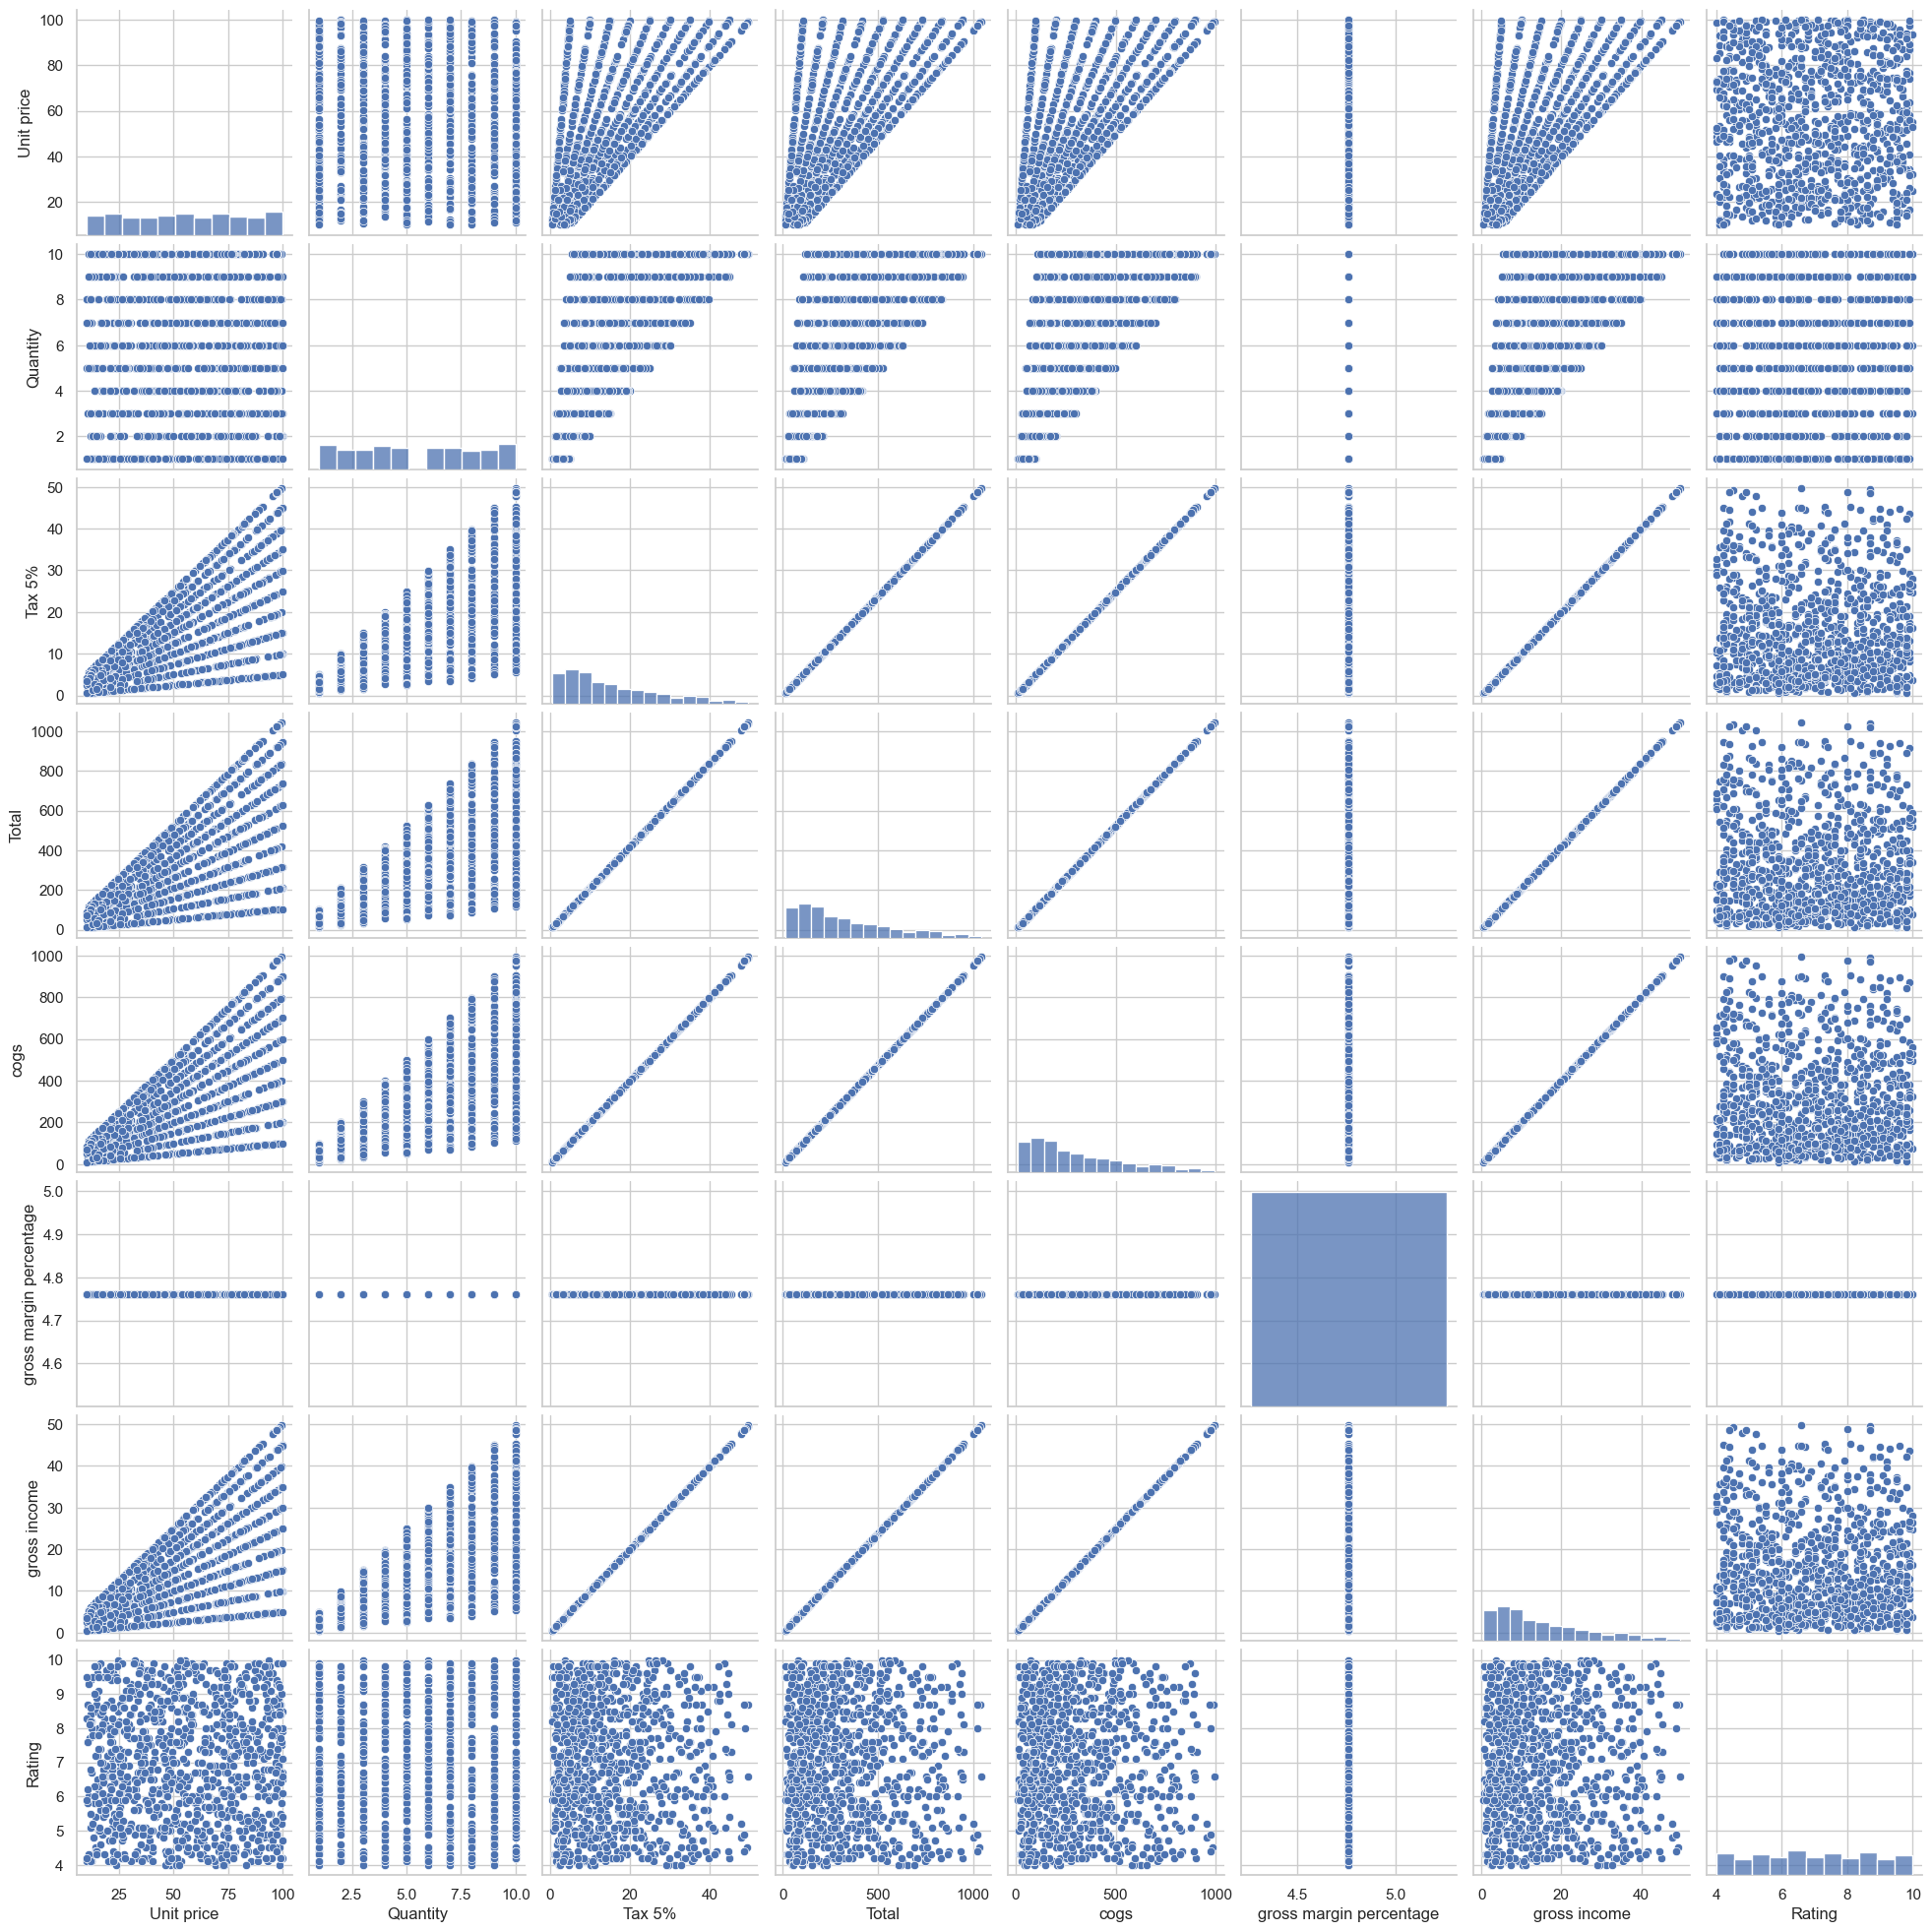

In [20]:
sns.pairplot(data=data)

**REGPLOT**

**This method is used to plot data and a linear regression model fit. ... If strings, these should correspond with column names in “data”. When pandas objects are used, axes will be labeled with the series name. data: This is dataframe where each column is a variable and each row is an observation.**

The code bellow creates a regression plot that displays the relationship between the Rating and gross income variables, while also fitting a regression line to the data. 

<Axes: xlabel='Rating', ylabel='gross income'>

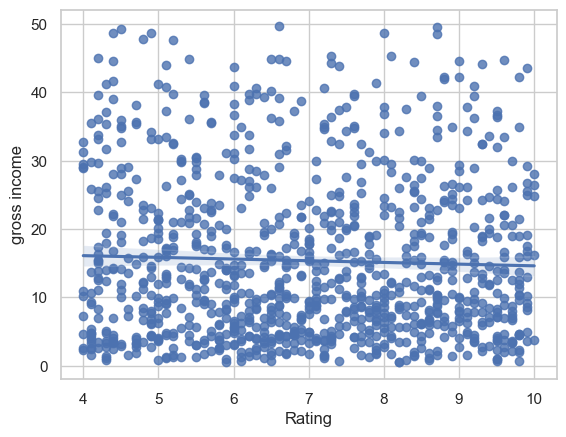

In [21]:
sns.regplot(x='Rating', y= 'gross income', data=data)

**SCATTER PLOT**

**A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables. From the graph, we can find the relationship between rating and cogs**



A scatter plot provides a quick, visual way to explore the relationship between two variables (Rating and cogs in this case).

<Axes: xlabel='Rating', ylabel='cogs'>

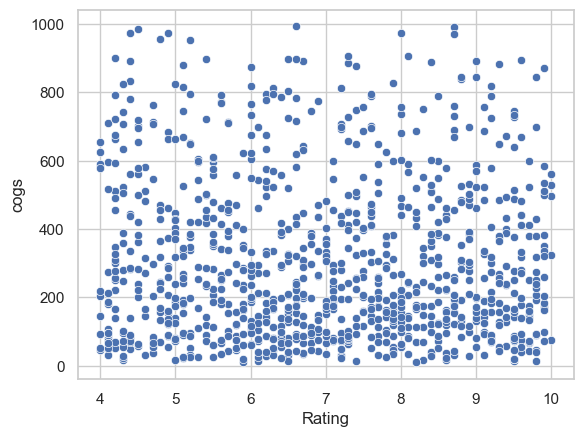

In [22]:
sns.scatterplot(x='Rating', y= 'cogs', data=data)

**JOINTPLOT**

**Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.**

A jointplot combines multiple types of visualizations into a single view. It not only shows the relationship between two variables (via the scatter plot) but also provides insights into the individual distributions of those variables (through the histograms or KDE plots along the axes).
This combination makes it easier to understand both the joint distribution (how the two variables are related) and the marginal distributions (how each variable is distributed individually).

From the chart, we can find that it's easier to visualize the number of each data point compared to the chart above

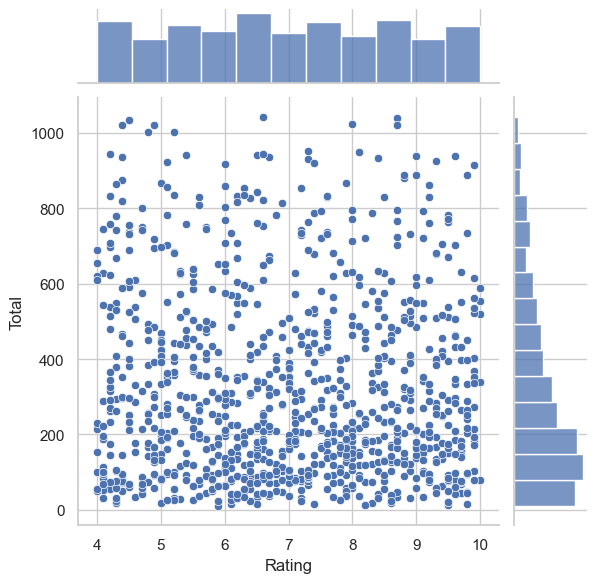

In [23]:
sns.jointplot(x='Rating', y= 'Total', data=data)

**LMPLOT**

**The lineplot (lmplot) is one of the most basic plots. It shows a line on a 2 dimensional plane. You can plot it with seaborn or matlotlib depending on your preference. The examples below use seaborn to create the plots, but matplotlib to show.**


sns.lmplot(x='Rating', y='cogs', data=data) creates a linear regression plot that shows the relationship between the Rating (x-axis) and cogs (y-axis), along with a regression line and confidence intervals.

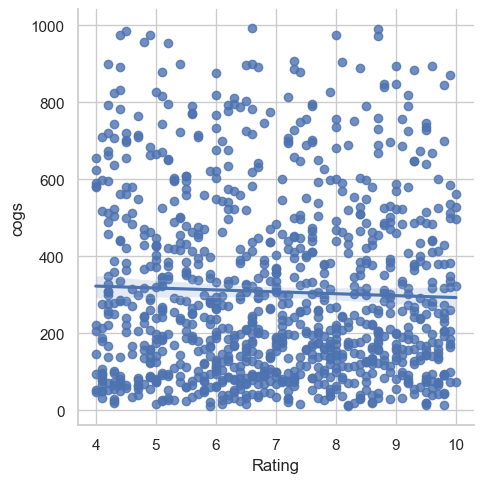

In [24]:
sns.lmplot(x='Rating', y= 'cogs', data=data)

In [25]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**KDE PLOT (DENSITY PLOT)**

**KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.**



The KDE plot can reveal how Unit price behaves across different Ratings and whether there is any significant variation in pricing for different product ratings.

<Axes: xlabel='Rating', ylabel='Unit price'>

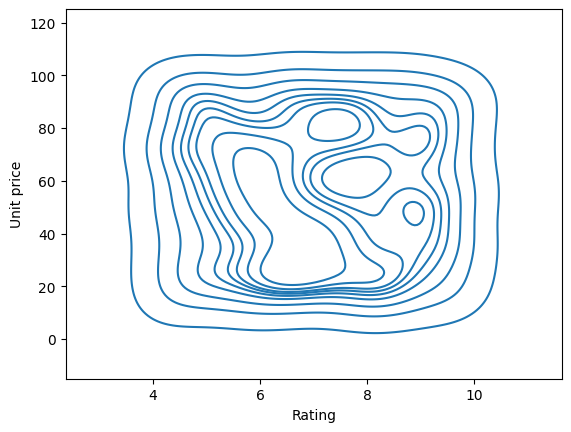

In [26]:
plt.style.use("default")

sns.kdeplot(x='Rating', y= 'Unit price', data=data)

**LINEPLOT**

**A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.**



The line plot provides a clear visualization of the relationship between Rating and Unit price, making it easy to identify any trends, whether linear or non-linear, and to assess how Unit price behaves as the Rating changes.

<Axes: xlabel='Rating', ylabel='Unit price'>

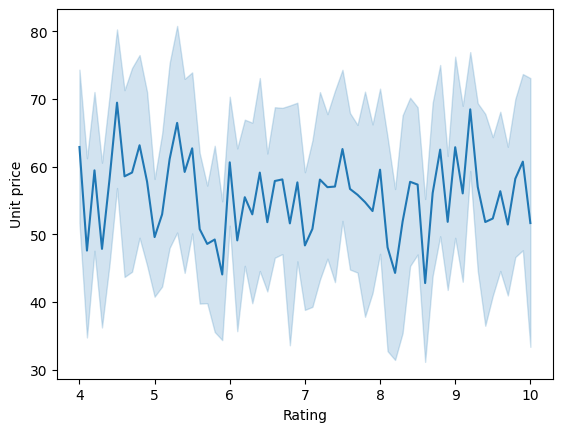

In [27]:
sns.lineplot(x='Rating', y= 'Unit price', data=data)

**BARPLOT**

**A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.**


The bar plot helps to visualize the relationship between Rating and Unit price for a specific subset of the data. By displaying the average Unit price for each Rating, the plot makes it easy to compare how Unit price differs between the ratings in the selected rows.

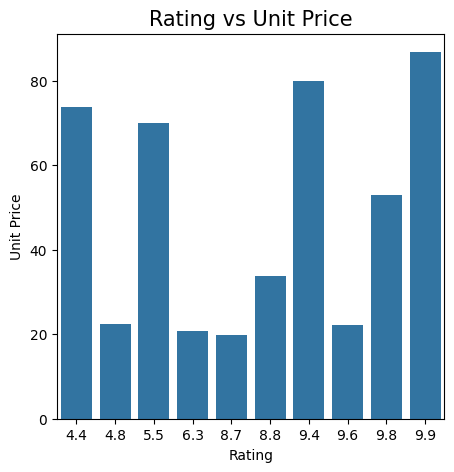

In [28]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=data[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()


In [29]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

The bar plot provides a clear visual comparison of how the average Quantity changes with each Rating in the subset of data from rows 170 to 179.

We can find most items have a rating more than 8

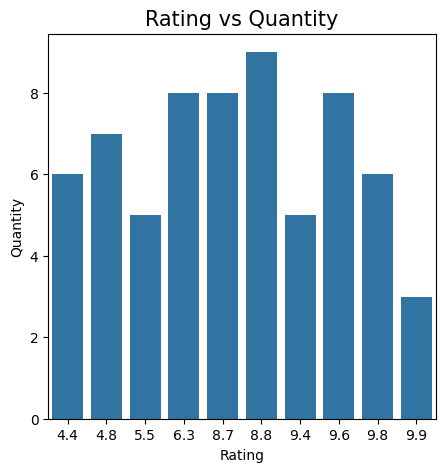

In [30]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=data[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

And we can also see the relationship between gender and customer, we can find males are more likely to give higher rating.

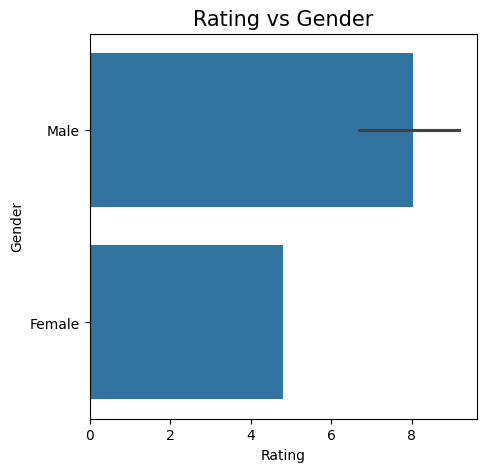

In [31]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=data[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

**Data Preprocessing**

This is part of data preprocessing, specifically focusing on converting categorical data into a numerical format for machine learning. 
After encoding categorical variables, the next steps would typically involve handling missing data, scaling numerical features, and preparing the dataset for machine learning models.

In [32]:
#lets find the categorialfeatures
list_1=list(data.columns)

list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [33]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [34]:
y=data['Gender']
x=data.drop('Gender',axis=1)

In [35]:
Data = pd.read_csv("https://raw.githubusercontent.com/gngnggnn1/mengxin2017/refs/heads/master/supermarket_sales%20-%20Sheet1.csv")

# Data Visualization & Analysis

Find the number of unique values in the Customer type column of the dataset data.

In [36]:
data['Customer type'].nunique()

2

This regression plot allows us to visually explore the relationship between Quantity and cogs. If the linear regression line has a clear upward or downward trend, it suggests a relationship between the number of items sold and the total cost of goods sold.

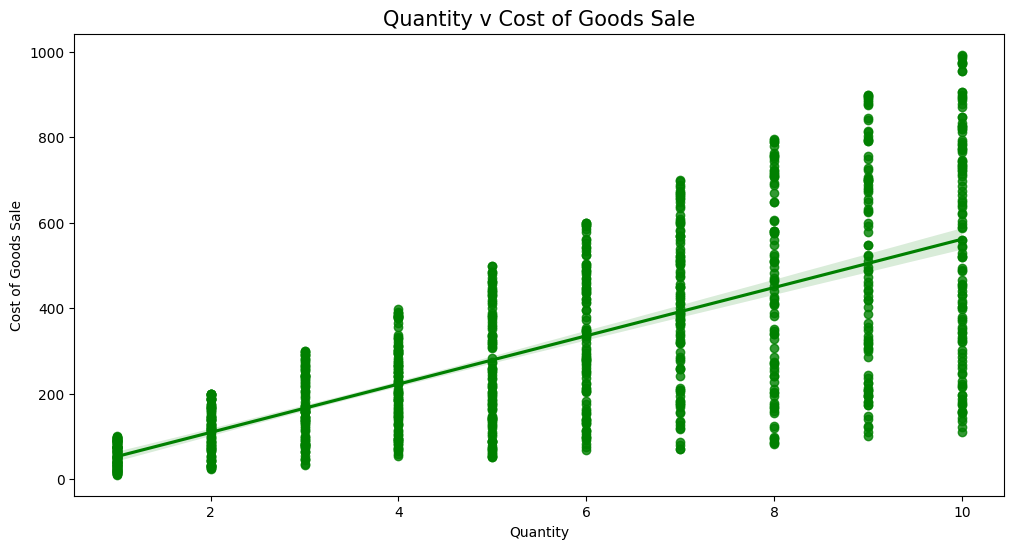

In [37]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=Data,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

The regression plot helps us understand whether there's a linear relationship between Unit Price and Gross Income. The regression line shows a clear trend, this suggests a correlation between the two variables.

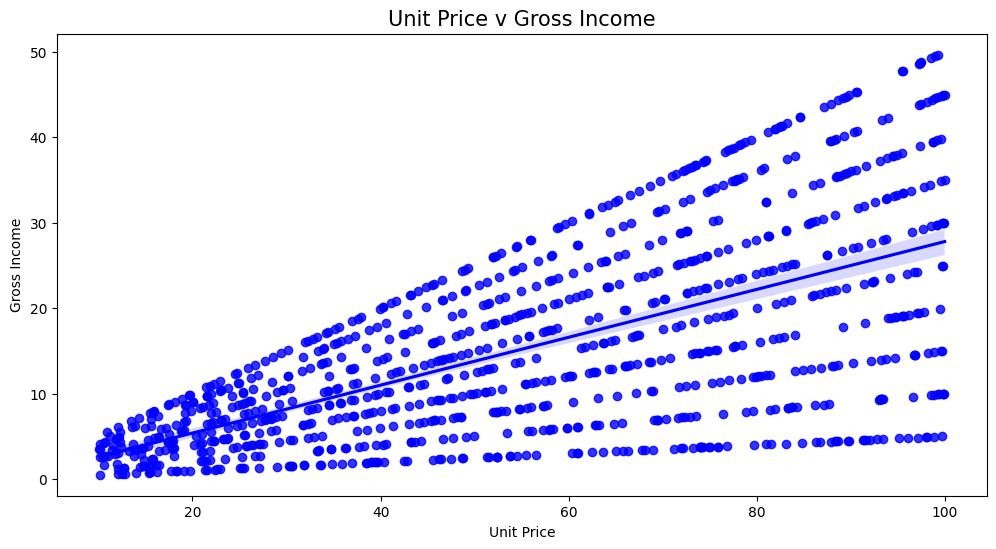

In [38]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=Data,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

Visualizing a Gender based comparison related to Product Type

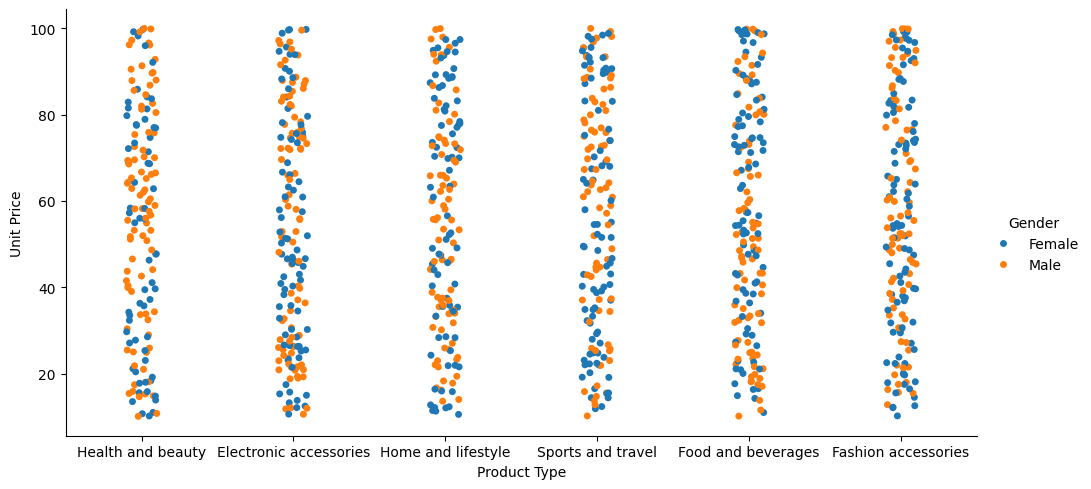

In [39]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=Data,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

Use "Jitter = False" to find the relation better

This categorical plot allows us to compare the distribution of Unit price across different Product line categories, while also examining how Gender influences this distribution. It helps identify any potential patterns or disparities between genders in relation to product pricing.

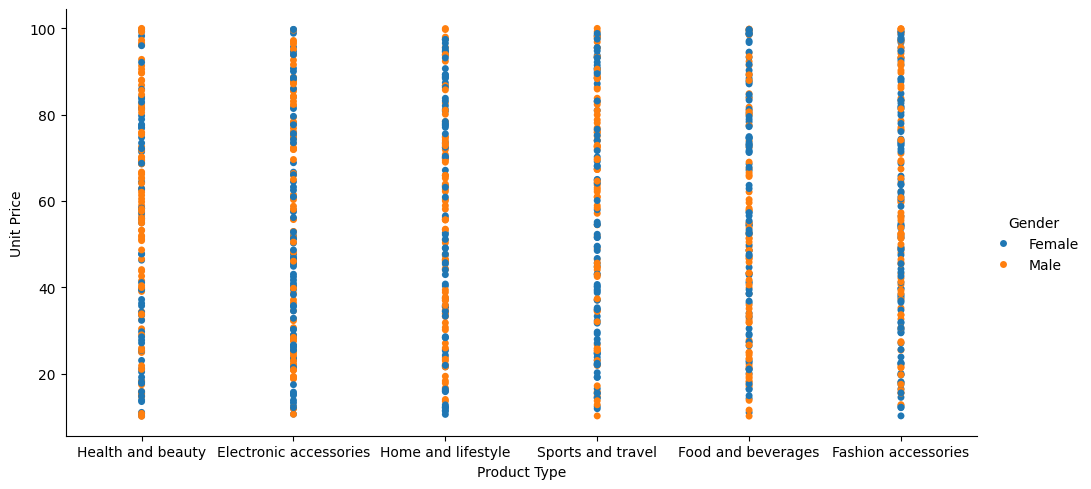

In [40]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=Data,aspect=2,jitter=False)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

This count plot is useful for analyzing the distribution of Product line across gender groups. It provides a clear visualization of gender-based preferences for different product categories.

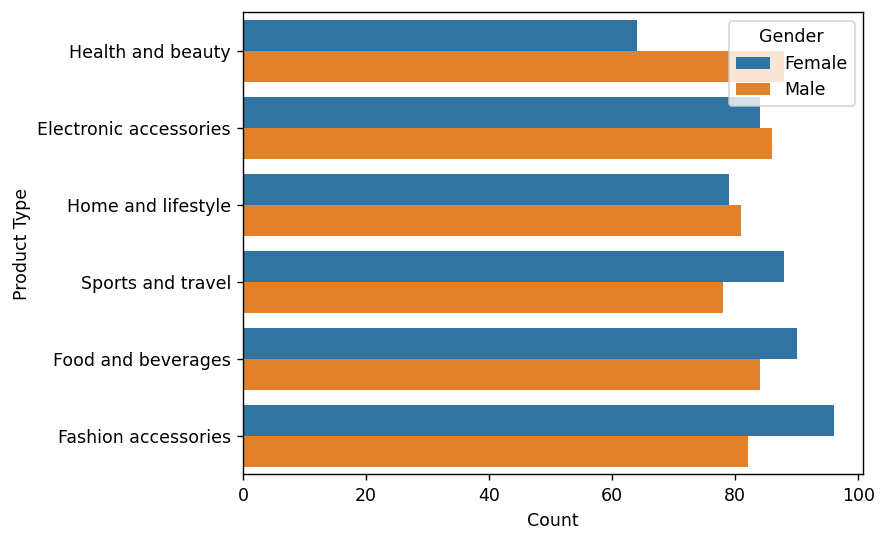

In [41]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = Data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, In Health & Beauty, Males are much more than Females whereas in Fashion accessories , Food & beverages and Sports & Travel Females are more and in the rest there is not much significant difference.

Visualizing a City based comparison related to Product Type

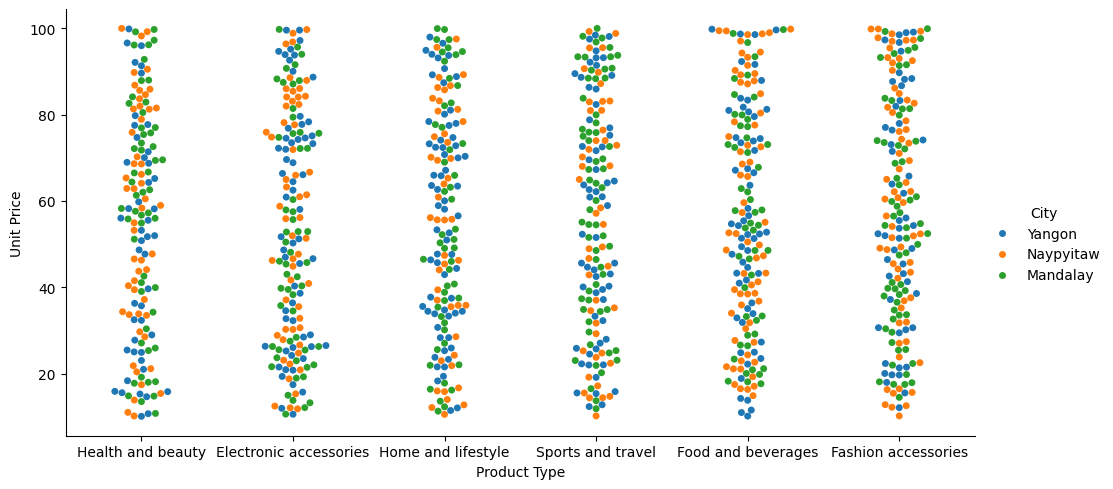

In [42]:
sns.catplot(x='Product line',y='Unit price',hue='City',kind='swarm',data=Data,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

The plot highlights which Product line categories are more popular in each city.

The visualization can reveal regional preferences and help tailor marketing or product distribution strategies based on city-specific trends.

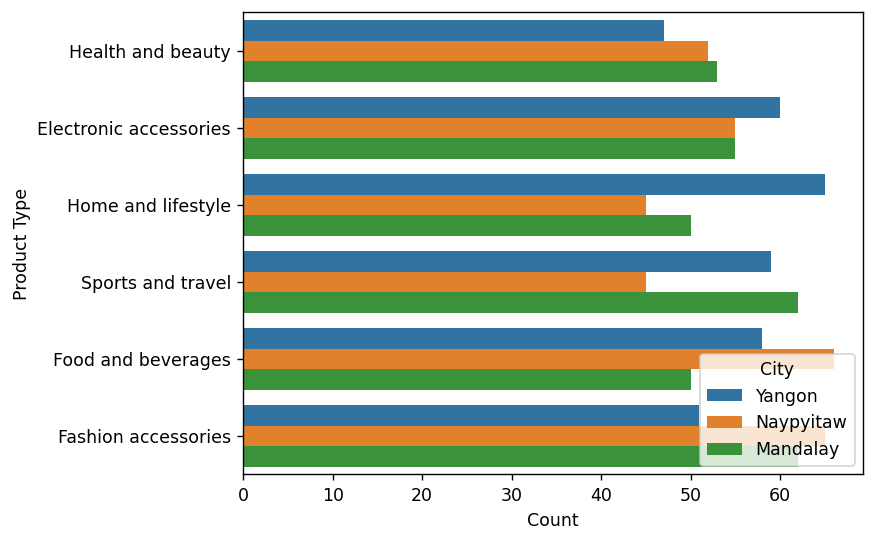

In [43]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = Data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, Yangon leads at Home & Lifestyle and Electronic accessories.

Naypyitaw leads at Food & Bevaerages and Fashion accessories.

Mandalay leads at Sports & Travel and Health & Beauty.

Finding the most used payment method for Product Type, Branch and City

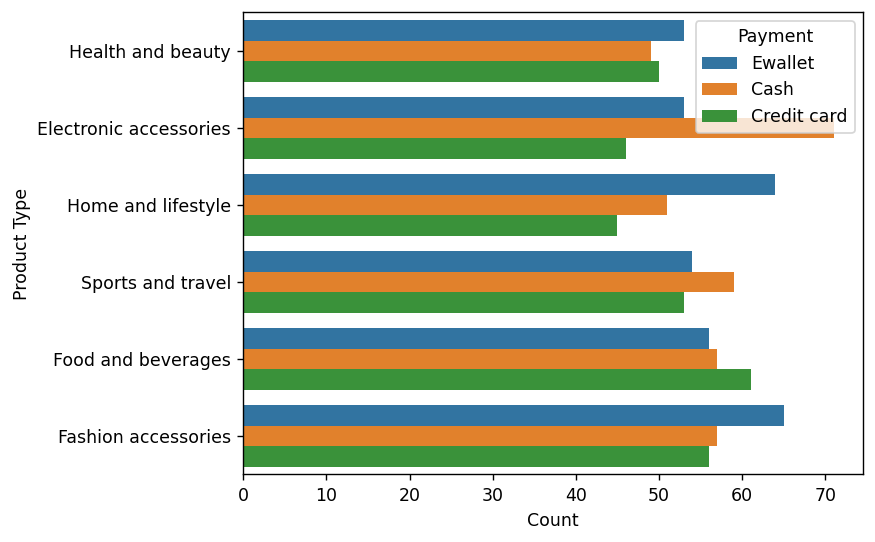

In [44]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Payment", data = Data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

The plot reveals how many transactions in each branch are paid for using different payment methods (e.g., cash, credit card, etc.).


The differences in bar lengths for each Payment category across Branch may suggest variations in customer behavior or branch-specific payment trends.

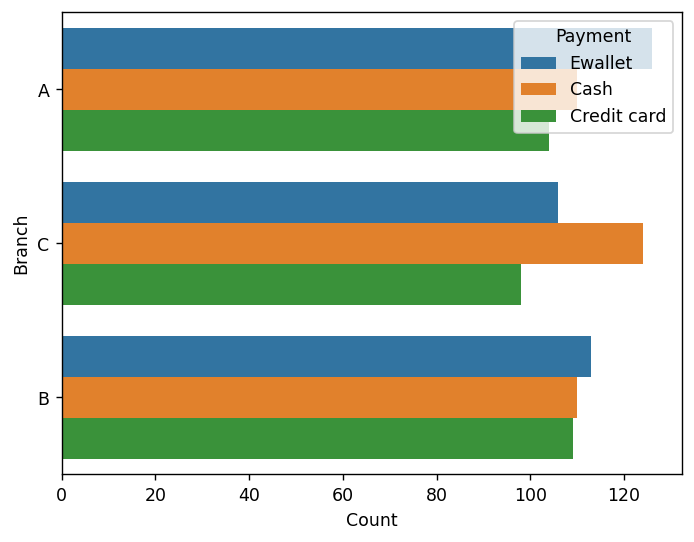

In [45]:
plt.figure(dpi=125)
sns.countplot(y ='Branch', hue = "Payment", data = Data) 
plt.xlabel('Count')
plt.ylabel('Branch')
plt.show()

The plot indicates how many transactions in each city were paid using various payment methods (e.g., cash, credit card, etc.)


Differences in the counts across the cities for each Payment type might suggest regional patterns, which could be useful for understanding local payment trends or adapting marketing strategies to each city's payment preferences.

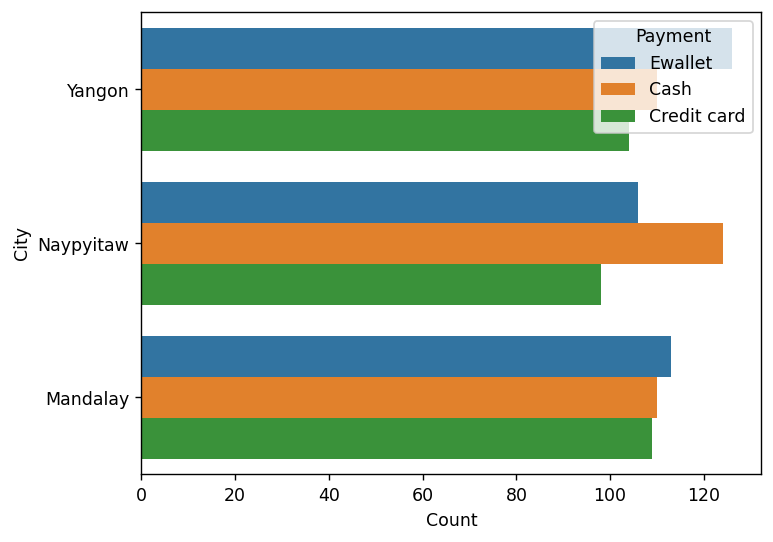

In [46]:
plt.figure(dpi=125)
sns.countplot(y ='City', hue = "Payment", data = Data) 
plt.xlabel('Count')
plt.ylabel('City')
plt.show()



Finding Which Branch has better sale for a particular product type


Significant differences in the counts for each Branch across Product lines may indicate branch-specific preferences or inventory distribution, helping businesses understand which branches perform better with certain products.


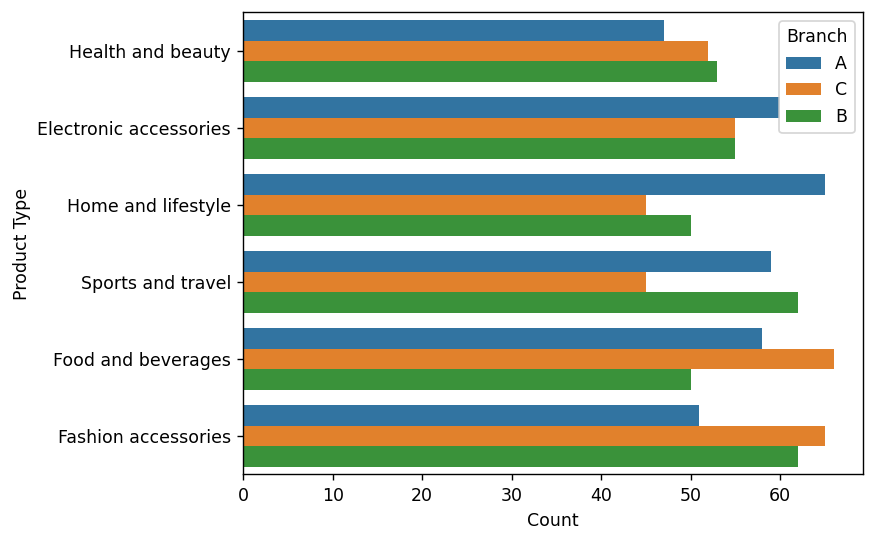

In [47]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Branch", data = Data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

# TRAINING AND TESTING DATA

The code splits the dataset into training and testing sets, which is a crucial step for training and evaluating machine learning models. 

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [49]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


800
200
800
200


# MODELS

**1. KNeighborsClassifier**

**By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.**



In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [51]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       100
           1       0.47      0.45      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[49 51]
 [55 45]]
Training Score:
 64.75


**2. SVC**

**In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.**


In [52]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)


SVC()

In [53]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.45      0.49      0.47       100
           1       0.44      0.40      0.42       100

    accuracy                           0.45       200
   macro avg       0.44      0.45      0.44       200
weighted avg       0.44      0.45      0.44       200

Confusion Matrix:
 [[49 51]
 [60 40]]
Training Score:
 55.50000000000001


**3. Naive Bayes**

**It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.**

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [55]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.35      0.41       100
           1       0.50      0.66      0.57       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.51      0.51      0.49       200

Confusion Matrix:
 [[35 65]
 [34 66]]
Training Score:
 55.125


**4. DECISION TREE CLASSIFIER**

**Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.**



In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [57]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       100
           1       0.56      0.27      0.36       100

    accuracy                           0.53       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.53      0.50       200

Confusion Matrix:
 [[79 21]
 [73 27]]
Training Score:
 63.87500000000001


**5.Random Forest Classifier**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**



In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [59]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50       100
           1       0.50      0.49      0.49       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

Confusion Matrix:
 [[51 49]
 [51 49]]
Training Score:
 100.0


**6. AdaBoostClassifier**

**An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.**



In [60]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(estimator = None)
adb.fit(x_train,y_train)


AdaBoostClassifier()

In [61]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       100
           1       0.54      0.54      0.54       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200

Confusion Matrix:
 [[54 46]
 [46 54]]
Training Score:
 67.0


**7. Gradient Boosting Classifier**

**Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.**



In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [63]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.48      0.48       100
           1       0.47      0.46      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[48 52]
 [54 46]]
Training Score:
 88.75


In [64]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
993,1,1
859,0,0
298,1,1
553,1,0
672,0,0
...,...,...
679,1,0
722,1,1
215,1,1
653,1,1


**8. XGBClassifier**

**XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.**

In [65]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...)

In [66]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.48      0.49       100
           1       0.50      0.53      0.52       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[48 52]
 [47 53]]
Training Score:
 60.0


**9. ExtraTreesClassifier**

**Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.**

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)


ExtraTreesClassifier(random_state=0)

In [68]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       100
           1       0.50      0.50      0.50       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

Confusion Matrix:
 [[50 50]
 [50 50]]
Training Score:
 100.0


In [81]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

strategy = ["prior", "stratified", "uniform", "most_frequent"]

for x in strategy:
    # DummyClassifier
    #“prior”, “stratified”, “uniform”, "most_frequent"
    dummy = DummyClassifier(strategy= x, random_state=0)
    dummy.fit(x_train, y_train)
    y_pred_dummy = dummy.predict(x_test)


    # DummyClassifier Metrics
    print("\nDummyClassifier Results with the strategy: " + x)
    print("Classification Report:\n", classification_report(y_test, y_pred_dummy))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dummy))
    print("Accuracy Score:\n", accuracy_score(y_test, y_pred_dummy) * 100)





DummyClassifier Results with the strategy: prior
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       100
           1       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200

Confusion Matrix:
 [[100   0]
 [100   0]]
Accuracy Score:
 50.0

DummyClassifier Results with the strategy: stratified
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57       100
           1       0.58      0.61      0.59       100

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.58      0.58      0.58       200

Confusion Matrix:
 [[55 45]
 [39 61]]
Accuracy Score:
 57.99999999999999

DummyClassifier Results with the strategy: uniform
Clas

Analysis:

    Best Accuracy:
        The Random Forest Classifier and Extra Trees Classifier both have 100% training accuracy, but they show significantly lower test accuracy (52% and 50%, respectively). This suggests overfitting to the training data.
        The AdaBoost classifier has the highest accuracy among the models. It also balances precision and recall for both classes equally.

    Best F1-Score:
        The Decision Tree Classifier has the highest F1-score for class 0 (63%), but its performance for class 1 is poor (36% F1-score). This imbalance indicates it's favoring class 0.
        AdaBoost shows balanced performance F1-score for both classes, suggesting it is a well-rounded model for this task.

    Best Precision and Recall:
        AdaBoost also shows the best overall balance between precision and recall. This indicates a stable model that doesn’t favor one class over the other.

    Training Score:
        The Random Forest Classifier and Extra Trees Classifier have the highest training scores (100%), but as mentioned earlier, they suffer from overfitting. Models like Gradient Boosting and AdaBoost show better generalization to the test data.

Conclusion:

    Best Model for Generalization: Based on test accuracy, AdaBoost seems to perform the best, with a balanced approach to precision and recall. The accuracy of it is higher than other models tested, and performs consistently well across both classes.
    Overfitting Models: The Random Forest and Extra Trees classifiers show high training accuracy but fail to generalize well on the test data, indicating overfitting.

Therefore, AdaBoost appears to be the best-performing model, offering a good balance between precision and recall, and better generalization than the other classifiers. If you want to improve performance further, you might consider fine-tuning the hyperparameters of AdaBoost or trying a hybrid model that combines the strengths of different algorithms.

# **THANK YOU**